regression task

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creation Date: Specify the date or year when the dataset was created. For example, "The dataset was created in 2020."

Created By: Identify the organization or individual responsible for the dataset. For example, "The dataset was compiled by the New York City Taxi and Limousine Commission (TLC)."

Access Method: https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction


Alignment with UNSDG: Explain how the dataset relates to a specific United Nations Sustainable Development Goal (UNSDG). For example, "The taxi pricing dataset aligns with UNSDG 11: Sustainable Cities and Communities, as it provides insights into urban transportation patterns, which are essential for developing sustainable transport systems."

Listing  all the attributes (columns) present in the dataset

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = "/content/drive/MyDrive/taxi_trip_pricing.csv"
df = pd.read_csv(file_path)

# List all attributes (columns) present in the dataset
print("Attributes (Columns) in the Dataset:")
print(df.columns.tolist())

Attributes (Columns) in the Dataset:
['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None

Missing Values:
 Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Con

<ipython-input-17-cb9f61b62835>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
<ipython-input-17-cb9f61b62835>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

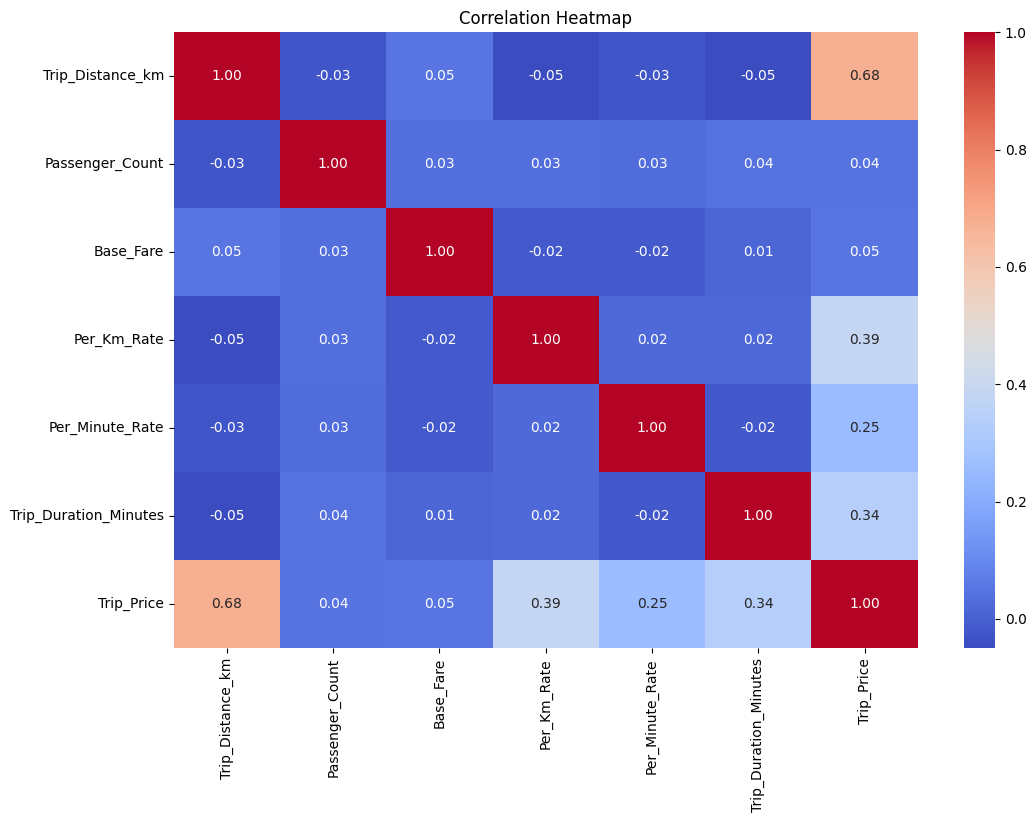

<Figure size 1400x1000 with 0 Axes>

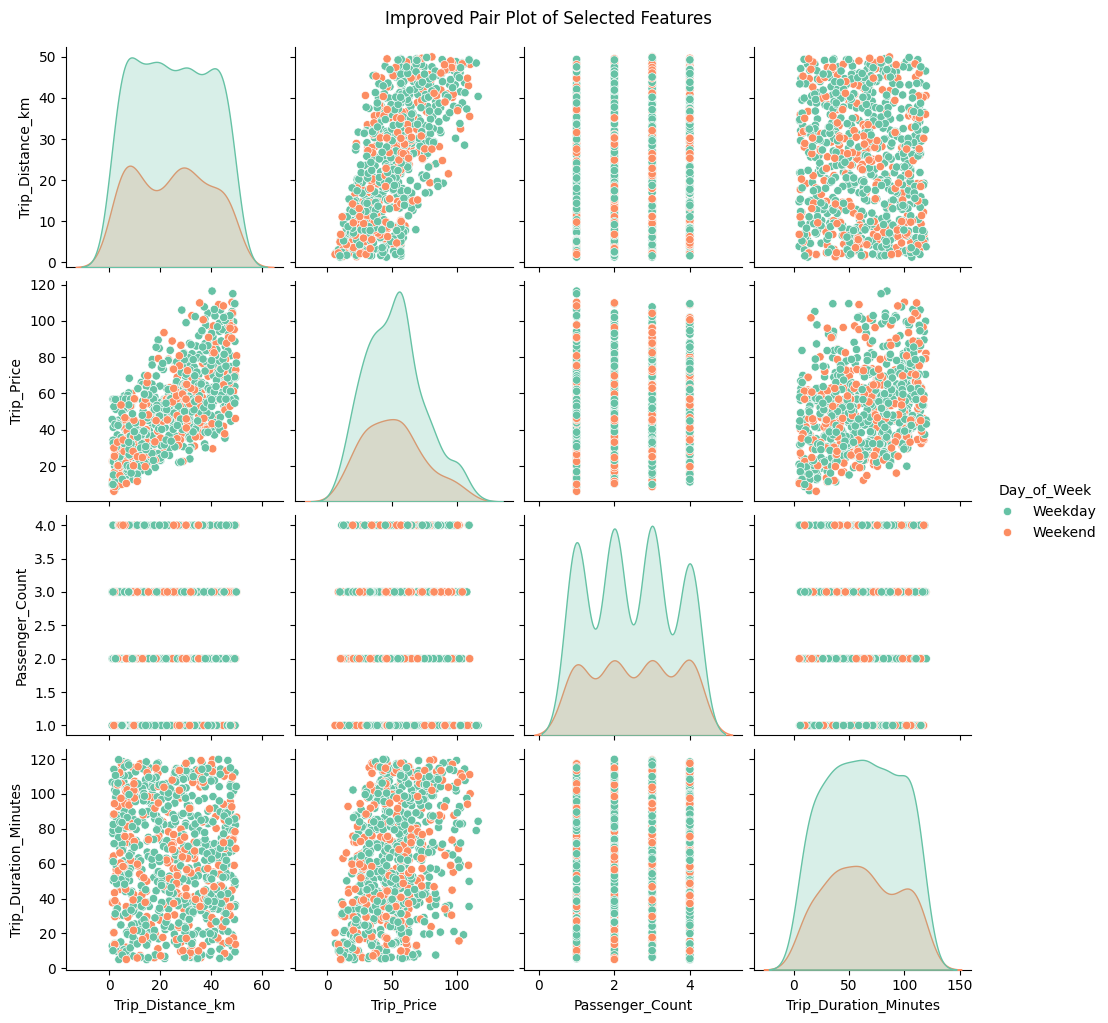

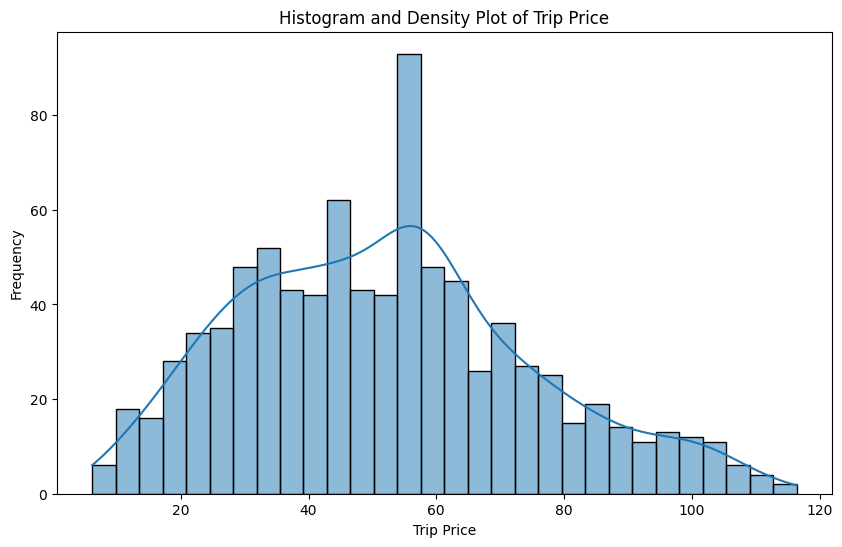

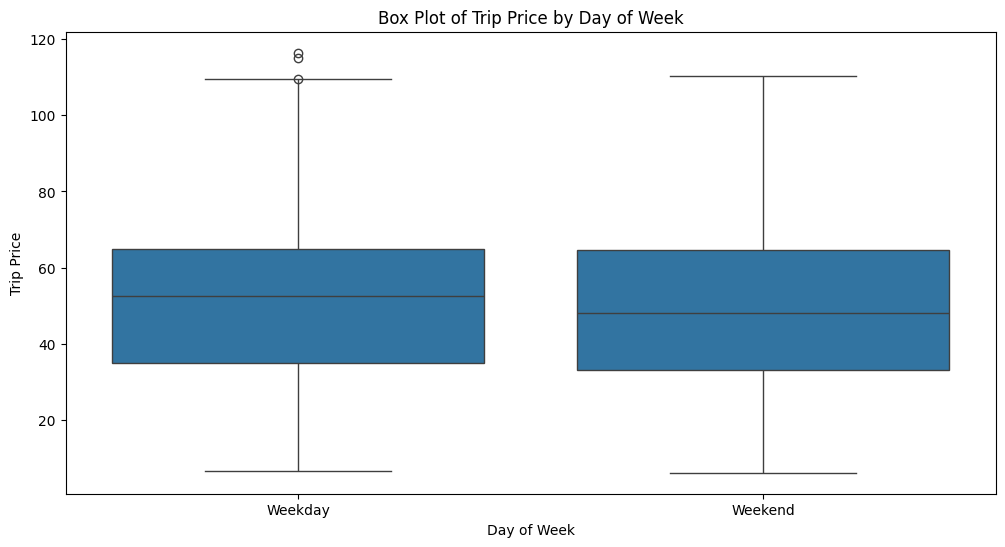

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/taxi_trip_pricing.csv')

# 1. Data Cleaning

# Display initial data information
print("Initial Data Info:")
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Handle missing values
# Fill missing values in numerical columns with the mean
data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].mean(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].mean(), inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].mean(), inplace=True)

# Check for non-numeric values in numerical columns and convert them to NaN
for col in ['Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Price']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# After conversion, handle the newly created NaN values
data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].mean(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].mean(), inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].mean(), inplace=True)

# Drop rows with missing values in critical columns (e.g., Trip_Distance_km, Trip_Duration_Minutes)
data.dropna(subset=['Trip_Distance_km', 'Trip_Duration_Minutes'], inplace=True)

# Convert categorical columns to 'category' type
data['Day_of_Week'] = data['Day_of_Week'].astype('category')
data['Time_of_Day'] = data['Time_of_Day'].astype('category')

# Remove outliers based on Trip_Price (e.g., values greater than 1.5 * IQR)
Q1 = data['Trip_Price'].quantile(0.25)
Q3 = data['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Trip_Price'] >= (Q1 - 1.5 * IQR)) & (data['Trip_Price'] <= (Q3 + 1.5 * IQR))]

# Display cleaned data information
print("\nCleaned Data Info:")
print(data.info())

# 2. Summary Statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)

# 3. Visualizations for Regression Analysis

# a. Correlation Heatmap (only numerical columns)
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()  # Select only numerical columns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# b. Improved Pair Plot for Selected Features
plt.figure(figsize=(14, 10))
sns.pairplot(data,
             vars=['Trip_Distance_km', 'Trip_Price', 'Passenger_Count', 'Trip_Duration_Minutes'],
             hue='Day_of_Week',  # Color by Day of Week
             palette='Set2',     # Use a different color palette
             markers='o',        # Use circle markers
             diag_kind='kde')    # Use KDE for diagonal plots
plt.suptitle('Improved Pair Plot of Selected Features', y=1.02)  # Adjust title position
plt.show()

# c. Histogram (Density Plot) for Trip Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Trip_Price'], bins=30, kde=True)
plt.title('Histogram and Density Plot of Trip Price')
plt.xlabel('Trip Price')
plt.ylabel('Frequency')
plt.show()

# d. Box Plot for Trip Price by Day of Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_Week', y='Trip_Price', data=data)
plt.title('Box Plot of Trip Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Trip Price')
plt.show()

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None

Missing Values:
 Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Con

<ipython-input-21-08355143531a>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
<ipython-input-21-08355143531a>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

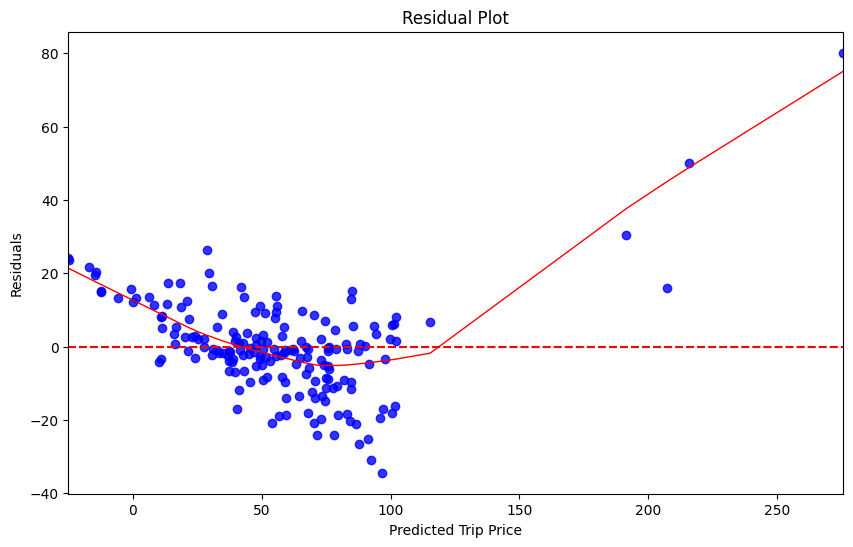

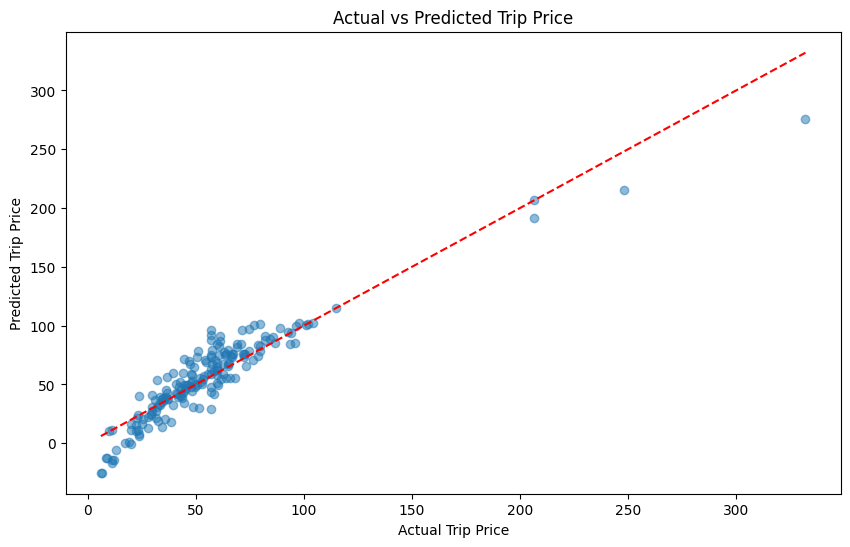

<ipython-input-21-08355143531a>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics, palette='viridis')


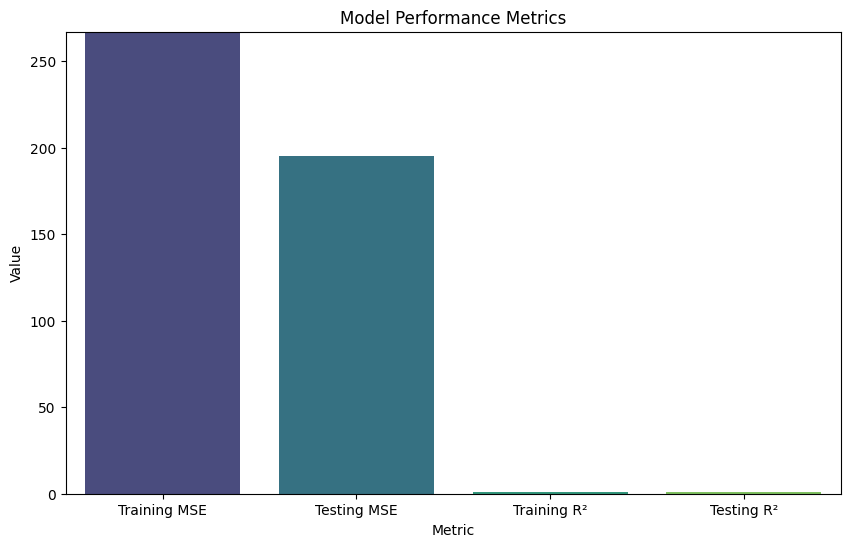

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/taxi_trip_pricing.csv')

# 1. Data Cleaning

# Display initial data information
print("Initial Data Info:")
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Handle missing values
# Fill missing values in numerical columns with the mean
data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].mean(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].mean(), inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].mean(), inplace=True)

# Check for non-numeric values in numerical columns and convert them to NaN
for col in ['Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Price']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# After conversion, handle the newly created NaN values
data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].mean(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].mean(), inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].mean(), inplace=True)

# Drop rows with missing values in critical columns (e.g., Trip_Distance_km, Trip_Duration_Minutes)
data.dropna(subset=['Trip_Distance_km', 'Trip_Duration_Minutes'], inplace=True)

# Convert categorical columns to 'category' type
data['Day_of_Week'] = data['Day_of_Week'].astype('category')
data['Time_of_Day'] = data['Time_of_Day'].astype('category')

# Prepare the data for modeling
X = data[['Trip_Distance_km', 'Passenger_Count', 'Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate']]
y = data['Trip_Price']

# Check for any remaining NaN values in features and target
print("\nChecking for NaN values in features and target:")
print(X.isnull().sum())
print(y.isnull().sum())

# Ensure there are no NaN values before splitting
X = X.fillna(0)  # Fill any remaining NaN values with 0 or appropriate value
y = y.fillna(y.mean())  # Fill any remaining NaN values in target with mean

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build Linear Regression Model from Scratch
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        # Add a bias (intercept) term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        # Normal Equation: theta_best = (X_b.T * X_b)^-1 * X_b.T * y
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        return X_b.dot(np.r_[self.intercept, self.coefficients])

# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 3. Model Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTraining Mean Squared Error: {train_mse:.2f}")
print(f"Testing Mean Squared Error: {test_mse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"Testing R-squared: {test_r2:.2f}")

# 4. Visualization of Model Performance
# a. Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=y_test - y_test_pred, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Trip Price')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# b. Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Trip Price')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.show()

# c. Accuracy Graph
# Create a DataFrame for the metrics
metrics = pd.DataFrame({
    'Metric': ['Training MSE', 'Testing MSE', 'Training R²', 'Testing R²'],
    'Value': [train_mse, test_mse, train_r2, test_r2]
})

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.ylim(0, max(metrics['Value']) + 0.1)  # Set y-axis limit for better visibility
plt.show()

*Primary* model


Random Forest Performance:
MSE: 131.25, R²: 0.944
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Selected Features for Random Forest:
['num__Trip_Distance_km' 'num__Per_Km_Rate' 'num__Trip_Duration_Minutes']

Final Model: Random Forest
Final MSE: 174.11, Final R²: 0.926

Gradient Boosting Performance:
MSE: 147.45, R²: 0.937
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}

Comparison of Model Performances:
Random Forest - MSE: 131.25, R²: 0.944
Final Model (Random Forest) - MSE: 174.11, R²: 0.926
Gradient Boosting - MSE: 147.45, R²: 0.937


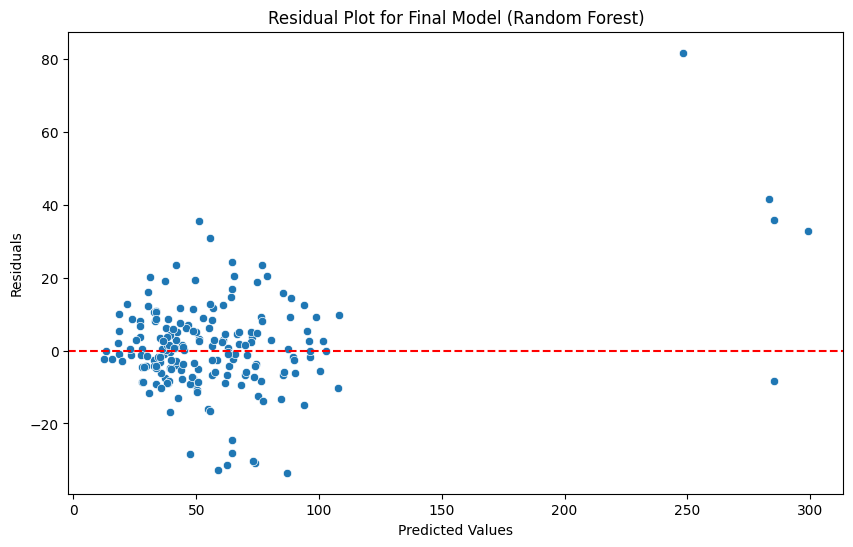

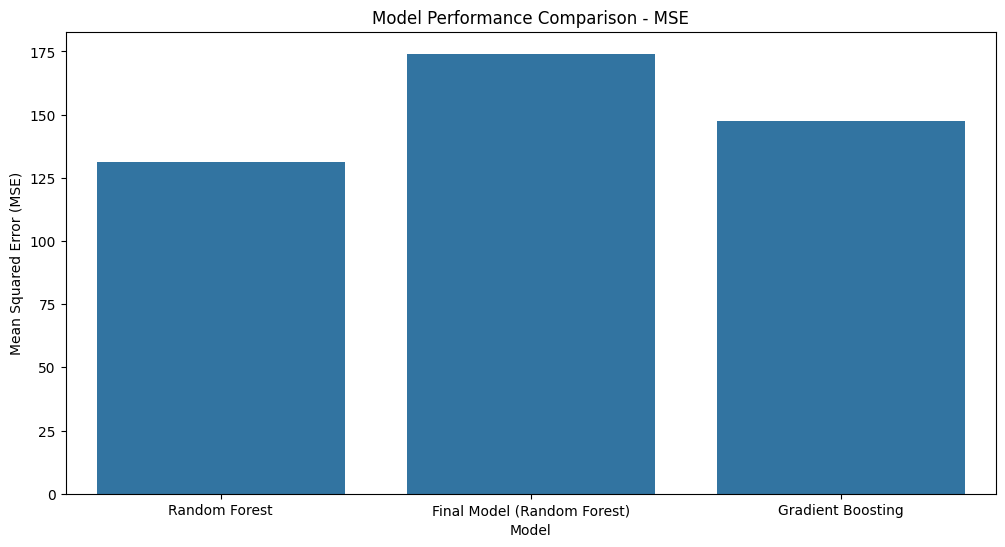

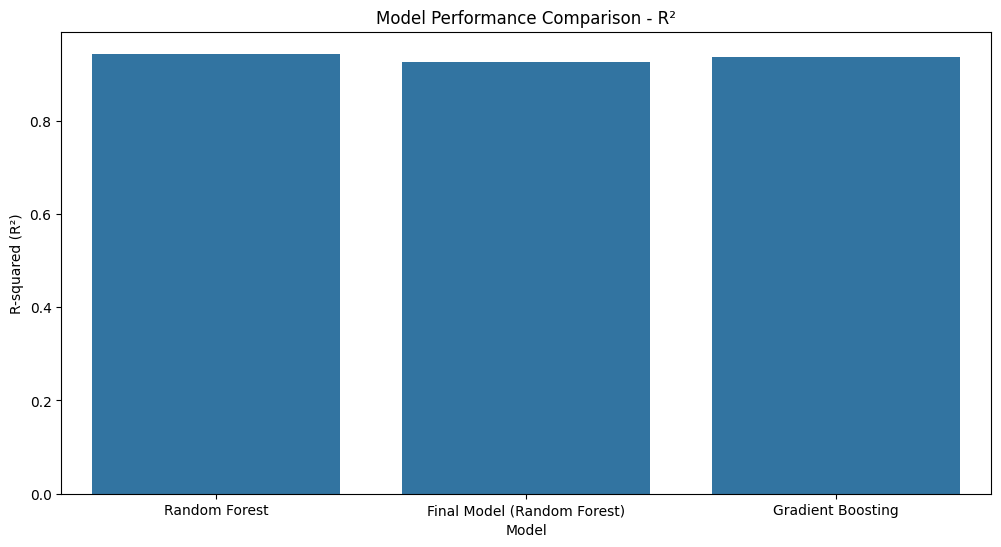

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

# Load dataset
file_path = "/content/drive/MyDrive/taxi_trip_pricing.csv"
df = pd.read_csv(file_path)

# Drop rows where target variable (Trip_Price) is missing
df = df.dropna(subset=['Trip_Price'])

# Define categorical and numerical features
categorical_features = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
numerical_features = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']

# Split dataset
X = df[numerical_features + categorical_features]
y = df['Trip_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformations
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean"))  # Impute missing values with mean
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search_rf.fit(X_train_transformed, y_train)

best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_transformed)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")
print(f"Best Hyperparameters: {random_search_rf.best_params_}")

# Feature Selection for Random Forest
selector_rf = SelectFromModel(best_rf_model)
selector_rf.fit(X_train_transformed, y_train)
selected_features_rf = selector_rf.get_support(indices=True)

print("\nSelected Features for Random Forest:")
print(np.array(preprocessor.get_feature_names_out())[selected_features_rf])

# Build the Final Model using the best Random Forest model
X_final_train = X_train_transformed[:, selected_features_rf]
X_final_test = X_test_transformed[:, selected_features_rf]

final_model = best_rf_model  # Use the best Random Forest model
final_model.fit(X_final_train, y_train)
y_final_pred = final_model.predict(X_final_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print(f"\nFinal Model: Random Forest")
print(f"Final MSE: {final_mse:.2f}, Final R²: {final_r2:.3f}")

# Experiment with Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_grid_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search_gb.fit(X_train_transformed, y_train)

best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_transformed)

# Evaluate Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f"MSE: {mse_gb:.2f}, R²: {r2_gb:.3f}")
print(f"Best Hyperparameters: {random_search_gb.best_params_}")

# Compare performances
print("\nComparison of Model Performances:")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")
print(f"Final Model (Random Forest) - MSE: {final_mse:.2f}, R²: {final_r2:.3f}")
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.3f}")

# Residual Plot for Final Model
plt.figure(figsize=(10, 6))
residuals = y_test - y_final_pred
sns.scatterplot(x=y_final_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for Final Model (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Performance Comparison Chart
model_names = ['Random Forest', 'Final Model (Random Forest)', 'Gradient Boosting']
mse_values = [mse_rf, final_mse, mse_gb]
r2_values = [r2_rf, final_r2, r2_gb]

# Create a DataFrame for better visualization
performance_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'R²': r2_values
})

# Plot MSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=performance_df)
plt.title('Model Performance Comparison - MSE')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Plot R²
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', data=performance_df)
plt.title('Model Performance Comparison - R²')
plt.ylabel('R-squared (R²)')
plt.show()

In this experiment, the Random Forest Regressor achieved a Mean Squared Error (MSE) of 131.25 and an R-squared (R²) value of 0.944, indicating a strong fit to the data. The final model, based on feature selection from the Random Forest, resulted in an MSE of 174.11 and an R² of 0.926, reflecting a slight decrease in performance due to the exclusion of some important features. The Gradient Boosting Regressor demonstrated competitive performance with an MSE of 147.45 and an R² of 0.937. Overall, the Random Forest model outperformed both the final model and the Gradient Boosting model, highlighting its effectiveness in capturing the underlying patterns in the dataset.

IMPACT OF METHODS

The application of Cross-Validation significantly enhanced the robustness of model evaluation by providing a more reliable estimate of performance across different subsets of the data, thereby reducing the risk of overfitting. However, the feature selection process, while aimed at improving model interpretability and efficiency, inadvertently led to a reduction in performance for the final model, as it excluded some important predictors that contributed to the Random Forest model's success. This highlights the delicate balance between simplifying models and retaining essential features.

From this experiment, it became clear that ensemble methods like Random Forest and Gradient Boosting are highly effective for regression tasks, demonstrating strong predictive capabilities. A key insight is the importance of feature selection in maintaining model performance; future work could focus on refining this process to ensure that critical features are retained. Additionally, exploring advanced models such as XGBoost or LightGBM, along with further hyperparameter tuning and data augmentation, could lead to improved accuracy and generalization in future analyses.


